In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
import pickle

<h3 style="color:#45f7f1; ">Q1. Downloading the data</h3>


In [3]:
df = pd.read_parquet("/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/01_intro/homework/data/yellow_tripdata_2023-01.parquet")

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
df.shape

(3066766, 19)

In [6]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [7]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,4.438480e-01,NaN,NaN,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01


In [8]:
df.tpep_dropoff_datetime.dtype

dtype('<M8[us]')

In [9]:
df.nunique()

VendorID                       2
tpep_pickup_datetime     1610975
tpep_dropoff_datetime    1611319
passenger_count               10
trip_distance               4387
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 257
DOLocationID                 261
payment_type                   5
fare_amount                 6873
extra                         68
mta_tax                       10
tip_amount                  4036
tolls_amount                 776
improvement_surcharge          5
total_amount               15871
congestion_surcharge           3
airport_fee                    3
dtype: int64

<h3 style="color:#45f7f1"> Q2. Computing duration </h3>

In [11]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [12]:
df.duration

0         0 days 00:08:26
1         0 days 00:06:19
2         0 days 00:12:45
3         0 days 00:09:37
4         0 days 00:10:50
                ...      
3066761   0 days 00:13:59
3066762   0 days 00:19:27
3066763   0 days 00:24:31
3066764   0 days 00:13:00
3066765   0 days 00:14:24
Name: duration, Length: 3066766, dtype: timedelta64[us]

In [13]:
df.duration = df['duration'].apply(lambda td: td.total_seconds()/60)

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [ ]:
df.duration.mean()

15.668995167330452

In [ ]:
df.duration.std()

42.59435124195458

<h3 style="color:#45f7f1"> Q3. Dropping outliers </h3>

In [ ]:
# sns.boxplot(df)

In [15]:
df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [16]:
df.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
660914,1,2023-01-08 14:26:14,2023-01-08 14:37:55,2.0,2.30,1.0,N,163,107,2,13.5,2.5,0.5,0.00,0.00,1.0,17.50,2.5,0.00,11.683333
1474758,2,2023-01-16 20:27:56,2023-01-16 20:33:06,1.0,1.22,1.0,N,43,239,1,7.9,1.0,0.5,2.58,0.00,1.0,15.48,2.5,0.00,5.166667
1928781,2,2023-01-21 09:34:05,2023-01-21 09:40:48,1.0,1.12,1.0,N,140,236,1,8.6,0.0,0.5,2.52,0.00,1.0,15.12,2.5,0.00,6.716667
237447,2,2023-01-04 09:33:45,2023-01-04 09:43:31,1.0,1.90,1.0,N,236,161,1,12.1,0.0,0.5,3.22,0.00,1.0,19.32,2.5,0.00,9.766667
789247,2,2023-01-10 07:42:41,2023-01-10 07:56:59,1.0,2.71,1.0,N,79,162,1,15.6,0.0,0.5,3.00,0.00,1.0,22.60,2.5,0.00,14.300000
3040421,2,2023-01-20 20:03:44,2023-01-20 20:26:09,NaN,2.84,NaN,None,161,262,0,19.2,0.0,0.5,4.64,0.00,1.0,27.84,NaN,NaN,22.416667
1075336,2,2023-01-12 20:37:20,2023-01-12 20:49:42,1.0,1.73,1.0,N,234,79,1,12.8,1.0,0.5,3.56,0.00,1.0,21.36,2.5,0.00,12.366667
1062868,2,2023-01-12 18:58:48,2023-01-12 19:47:23,1.0,16.07,2.0,N,161,132,2,70.0,5.0,0.5,0.00,6.55,1.0,86.80,2.5,1.25,48.583333
1084110,2,2023-01-12 22:50:16,2023-01-12 23:13:22,1.0,3.85,1.0,N,249,143,1,23.3,1.0,0.5,5.66,0.00,1.0,33.96,2.5,0.00,23.100000
1999769,2,2023-01-21 21:53:47,2023-01-21 21:53:57,2.0,0.00,5.0,N,48,48,1,90.0,0.0,0.0,18.70,0.00,1.0,112.20,2.5,0.00,0.166667


In [18]:
df.duration.max()

10029.183333333332

In [19]:
df.duration.min()

-29.2

In [21]:
len(((df.duration >=1) & (df.duration <=60)))

3066766

In [32]:
len(df[(df.duration >= 1) & (df.duration <= 60)]) / len(df) * 100

100.0

In [23]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

/tmp/ipykernel_16166/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

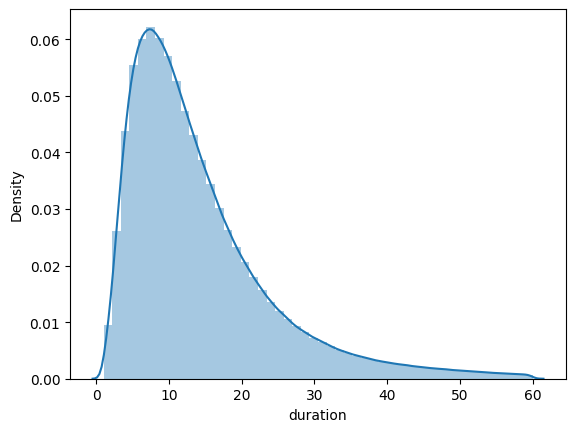

In [24]:
sns.distplot(df.duration)

<h3 style="color:#45f7f1"> Q4. One-hot encoding </h3>

In [25]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [26]:
df.PULocationID.nunique(), df.DOLocationID.nunique()

(255, 260)

In [27]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [30]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [31]:
df[categorical] = df[categorical].astype(str)

In [33]:
train_dicts = df[categorical+numerical].to_dict(orient='records')

In [34]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [36]:
X_train

<3009173x516 sparse matrix of type '<class 'numpy.float64'>'
	with 9027519 stored elements in Compressed Sparse Row format>

In [37]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 516)


<h3 style="color:#45f7f1"> Q5. Training a model </h3>

In [38]:
y_train = df['duration'].values

In [39]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 7.658403836937678


/home/kaustubh/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


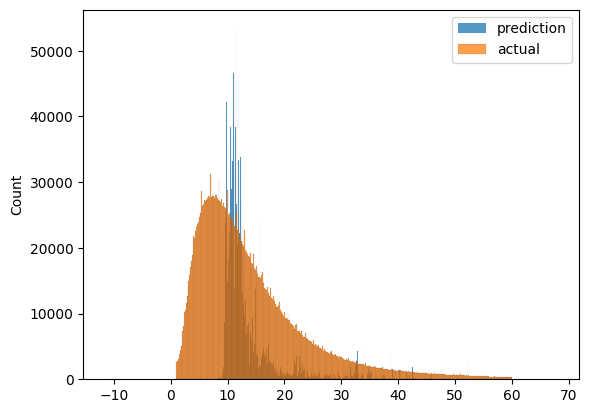

In [43]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

<h3 style="color:#45f7f1"> Q6. Evaluating the model</h3>

In [45]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [44]:

def read_data(filename):

    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [46]:
df_val = read_data("/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/01_intro/homework/data/yellow_tripdata_2023-02.parquet")

In [47]:
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.9,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.5,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000


In [48]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [49]:
X_val = dv.transform(val_dicts)

In [50]:
y_val = df_val['duration'].values

In [51]:
y_pred = lr.predict(X_val)

In [53]:
print(f'Val RMSE for Linear Regression: {mean_squared_error(y_val, y_pred, squared=False)}')

Val RMSE for Linear Regression: 7.8201754113565425


/home/kaustubh/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
ls = Lasso()
ls.fit(X_train,y_train)

y_predict=ls.predict(X_val)

print(f'Val RMSE for Lasso Regression: {mean_squared_error(y_val, y_pred, squared=False)}')

Val RMSE for Lasso Regression: 7.8201754113565425


/home/kaustubh/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
rd = Ridge(alpha=0.01)
rd.fit(X_train,y_train)

y_predict=rd.predict(X_val)

print(f'Val RMSE for Ridge Regression: {mean_squared_error(y_val, y_pred, squared=False)}')

Val RMSE for Ridge Regression: 7.8201754113565425


/home/kaustubh/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
with open('models/lr_reg.bin','wb') as f:
    pickle.dump((dv,lr),f)